In [99]:
trial = 'PR21'
isotope = '177Lu'
radiopharmaceutical = '177Lu - PSMA-617'
patient_id = 'CAVA0004'
cycle = '1'

calculations_performed_by = 'Sara Kurkowska'
date = '28-08-2023' 
calculations_verified_by = ''

In [100]:
from pr21_dataframes import getinputdata, getdosemapdata, intf2dcm
from patientdosimetry import PatientDosimetry
from mc import MonteCarlo
from dvk import DoseVoxelKernel
from olinda import Olinda
from dosemap_analysis import Dosemap
from dosiomicsclass import Radiomics

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [101]:
mimcsv_tp1, mimcsv_tp2, injectioninfo1, injectioninfo2, CT, SPECT, RT = getinputdata(patient_id, cycle)

          xdim  ydim  zdim   xsize   ysize   zsize
0  SPECT   128   128   233  4.7952  4.7952  4.7952
1     CT   128   128   233  4.7952  4.7952  4.7952
2     RT   128   128   233                        


In [102]:
CAVA0004_cycle01 = PatientDosimetry(patient_id, cycle, isotope, CT, SPECT, RT, mimcsv_tp1, injectioninfo1, mimcsv_tp2, injectioninfo2)

In [103]:
organslist = CAVA0004_cycle01.dataframe()

Covariance of the parameters could not be estimated


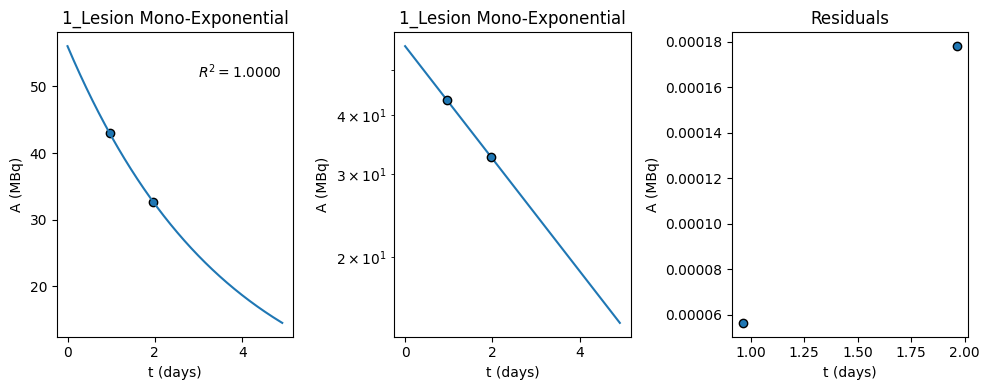

Covariance of the parameters could not be estimated


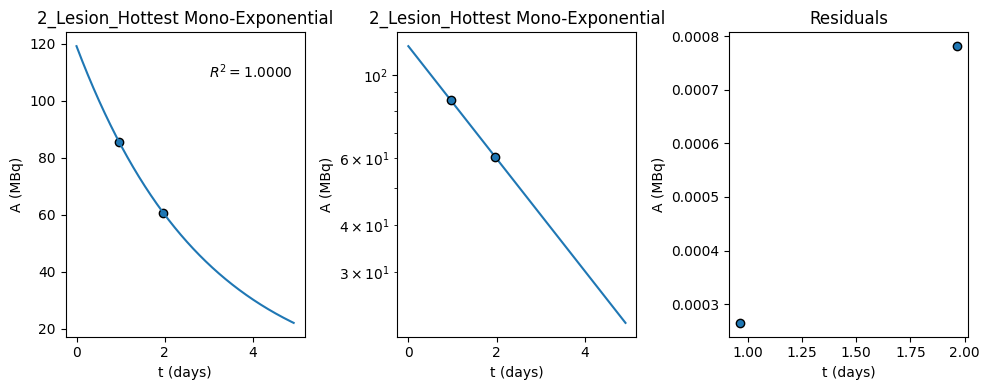

Covariance of the parameters could not be estimated


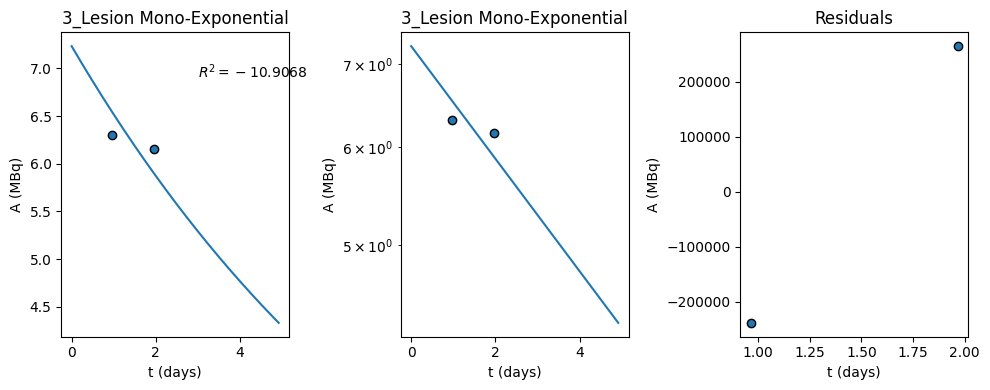

Covariance of the parameters could not be estimated


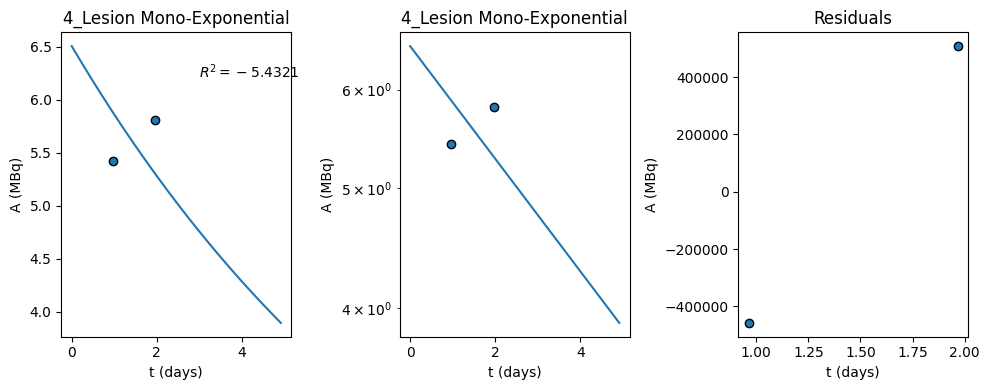

Covariance of the parameters could not be estimated


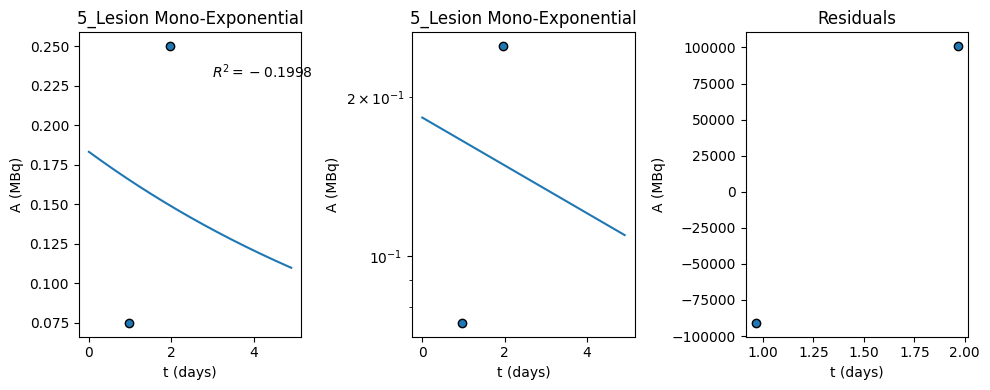

Covariance of the parameters could not be estimated


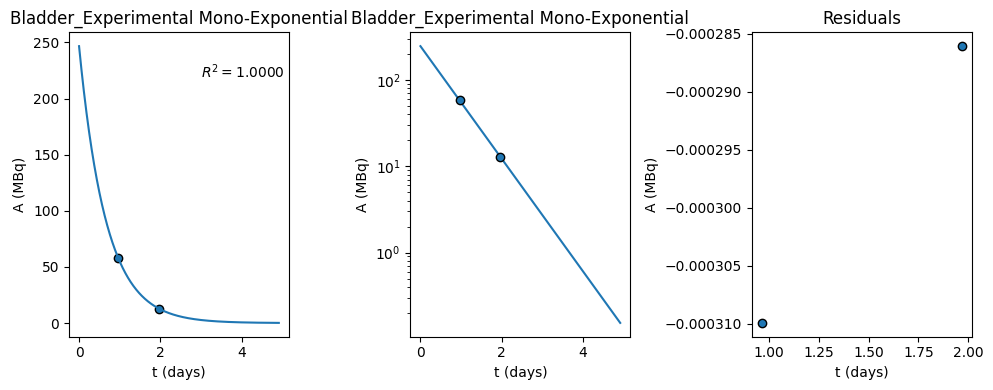

Covariance of the parameters could not be estimated


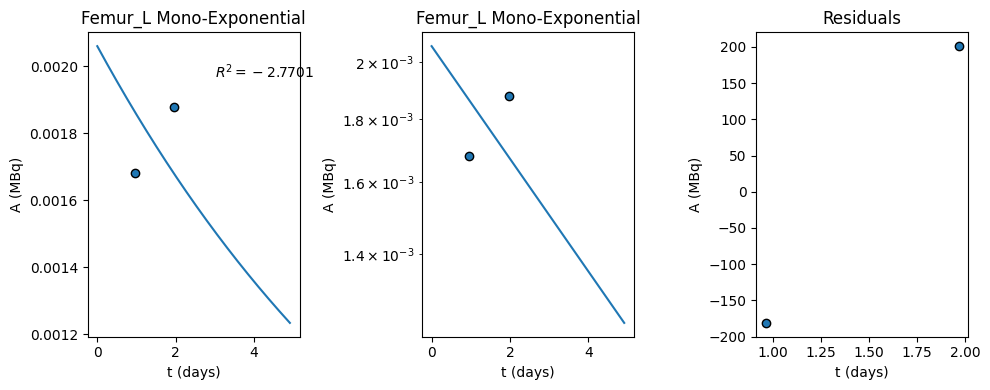

Covariance of the parameters could not be estimated


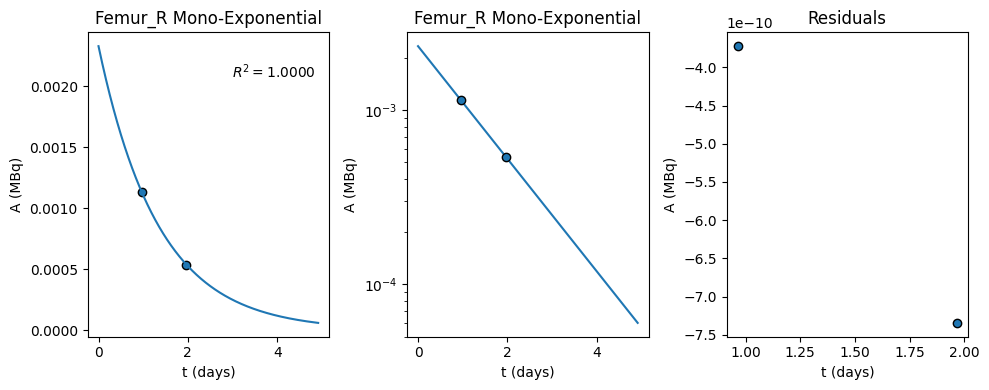

Covariance of the parameters could not be estimated


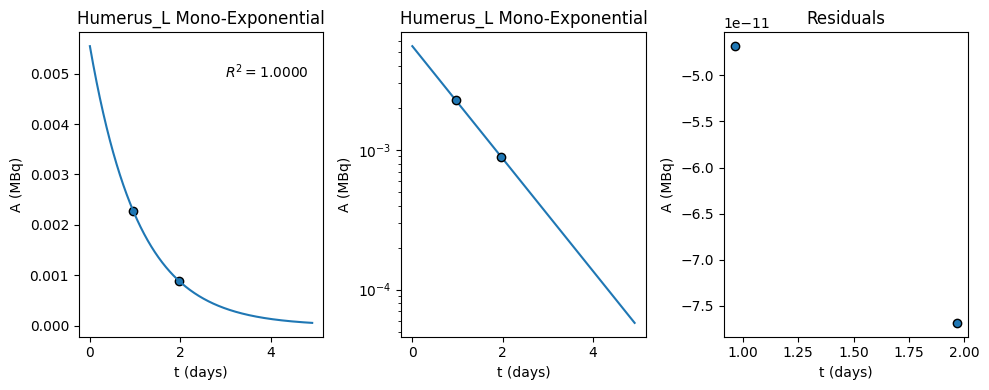

Covariance of the parameters could not be estimated


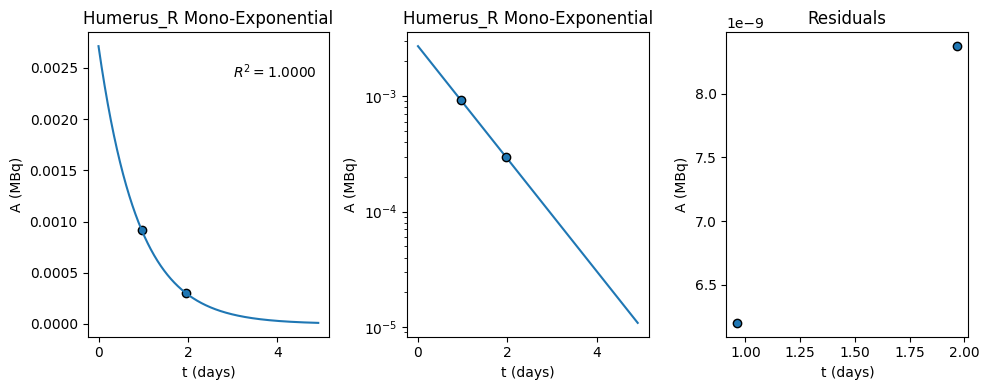

Covariance of the parameters could not be estimated


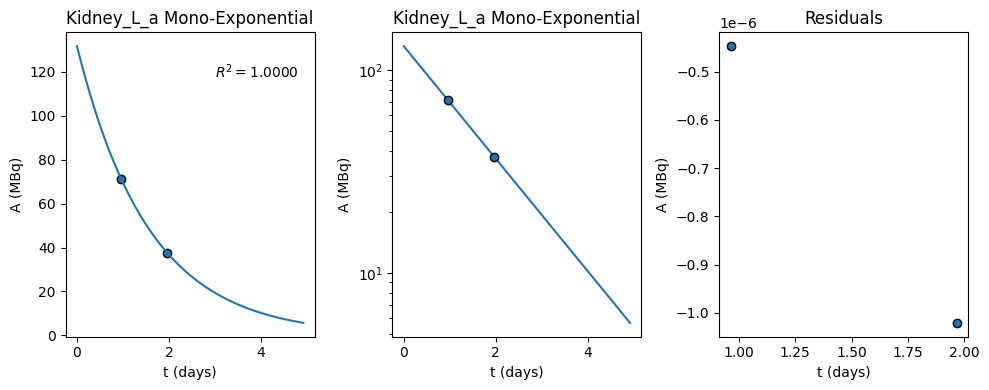

Covariance of the parameters could not be estimated


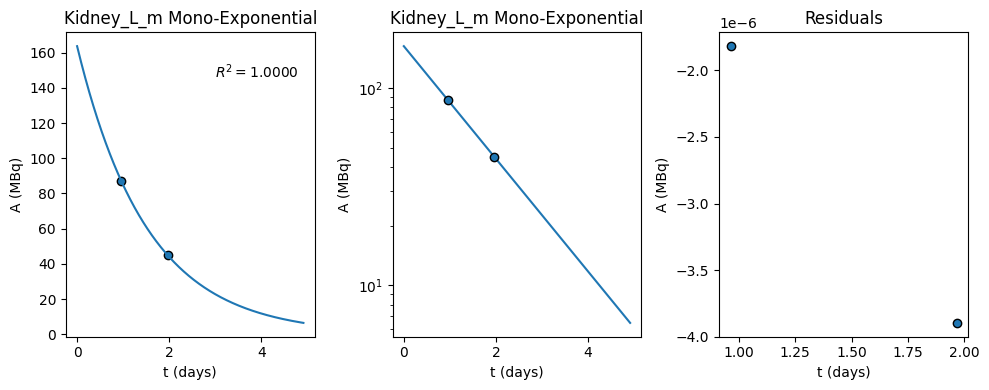

Covariance of the parameters could not be estimated


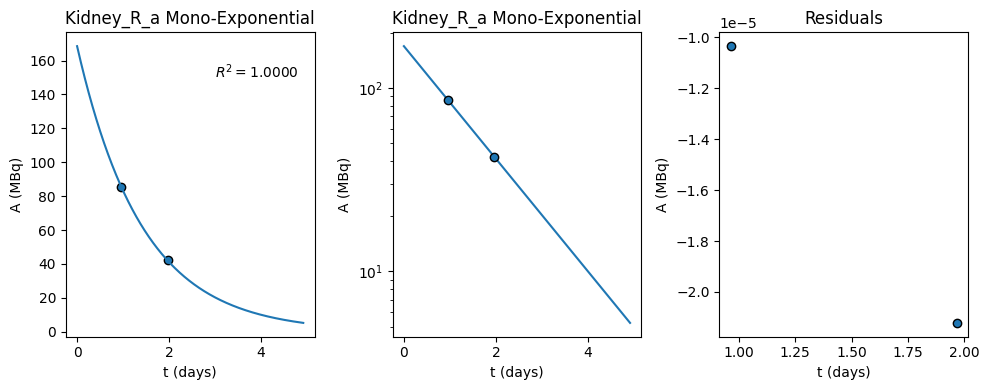

Covariance of the parameters could not be estimated


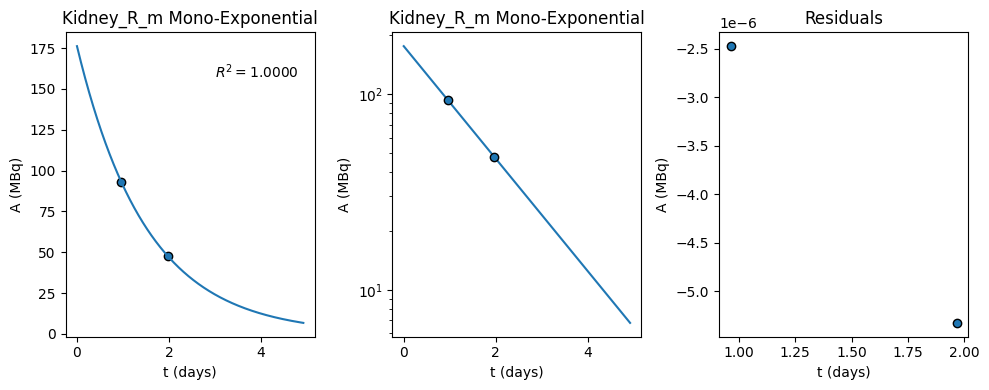

Covariance of the parameters could not be estimated


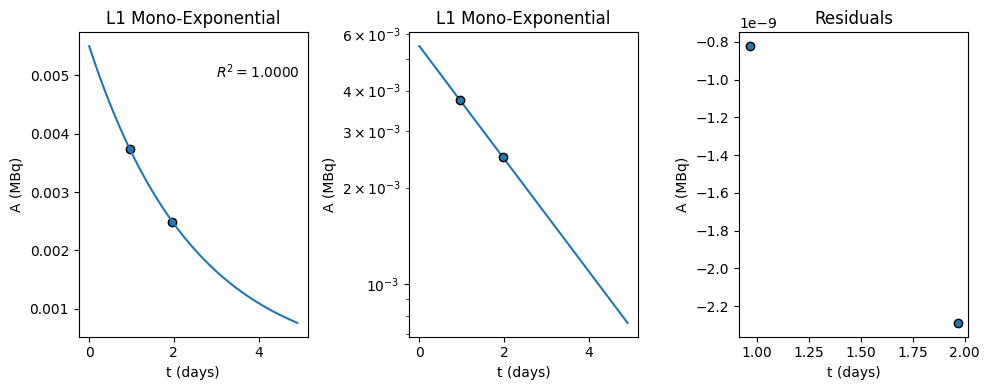

Covariance of the parameters could not be estimated


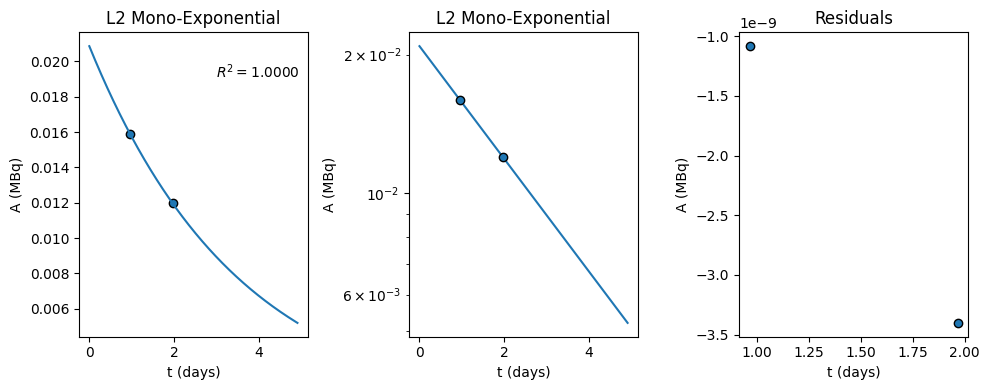

Covariance of the parameters could not be estimated


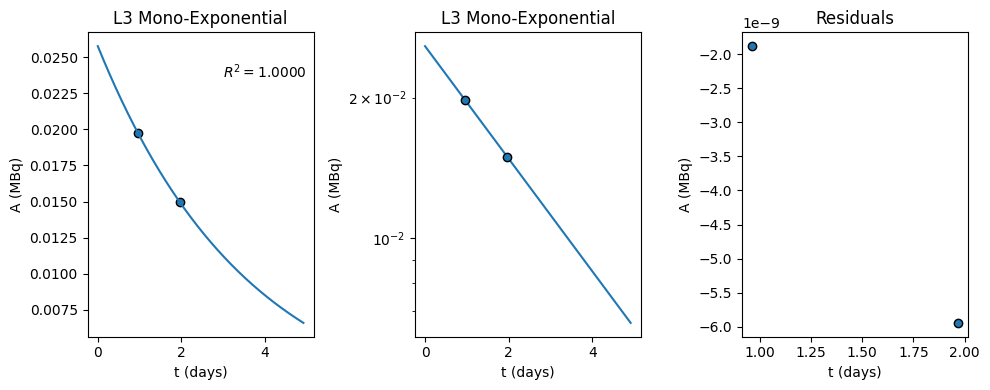

Covariance of the parameters could not be estimated


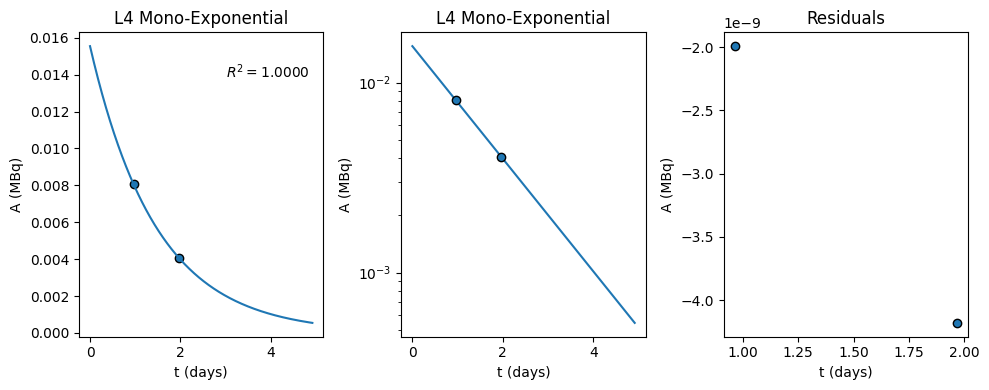

Covariance of the parameters could not be estimated


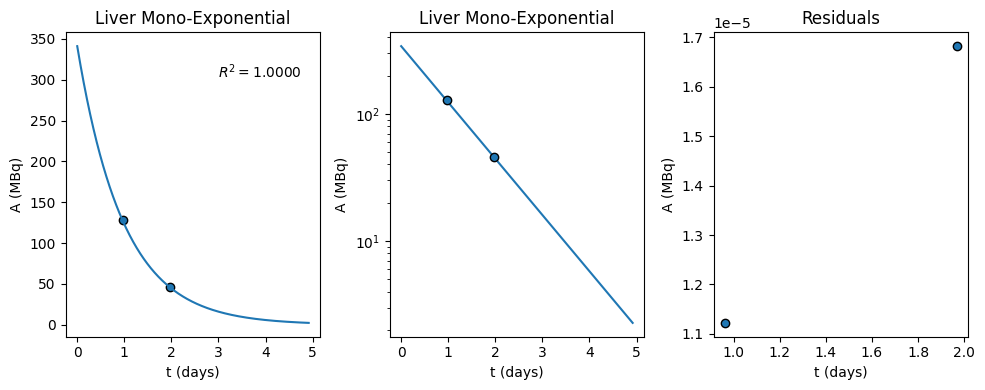

Covariance of the parameters could not be estimated


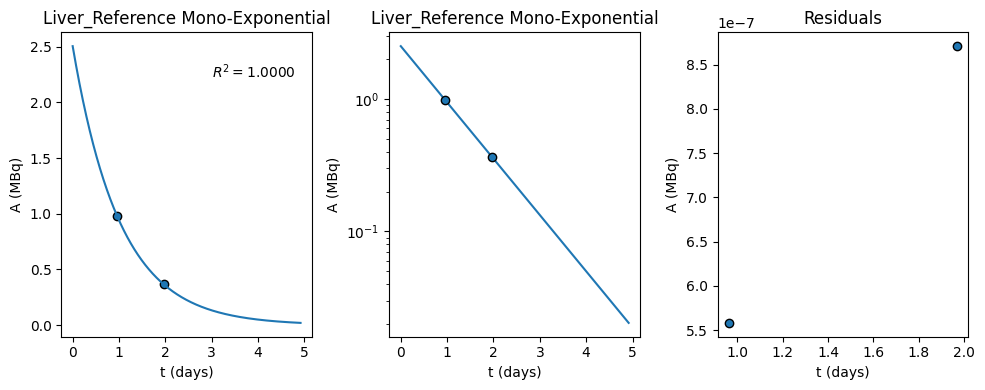

Covariance of the parameters could not be estimated


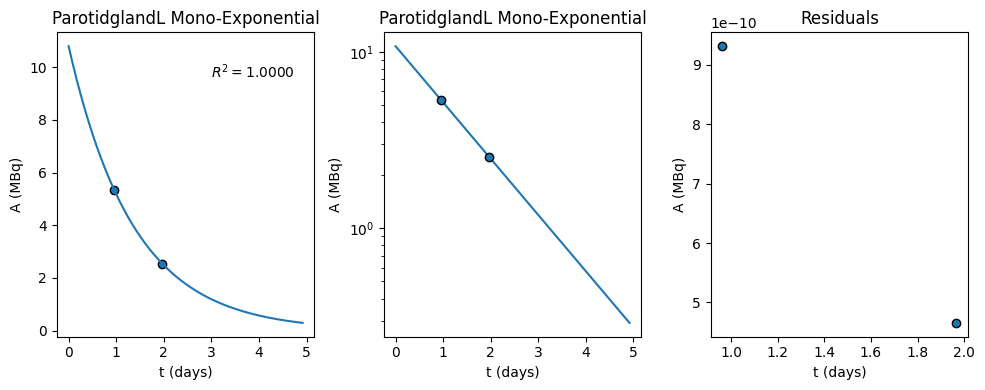

Covariance of the parameters could not be estimated


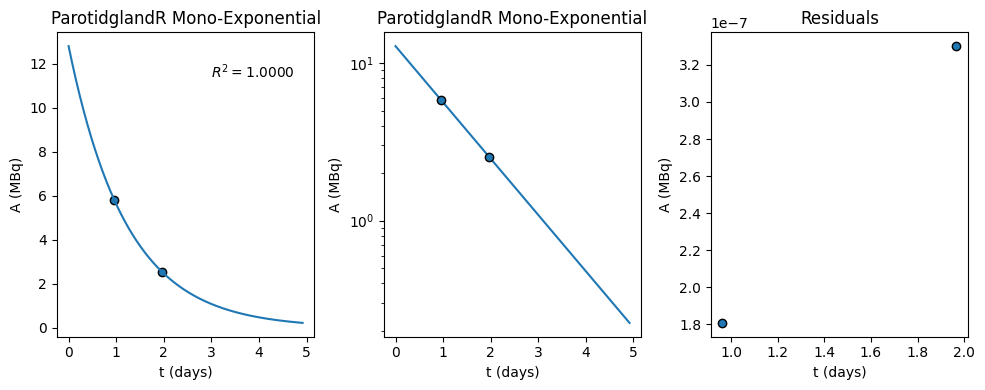

Covariance of the parameters could not be estimated


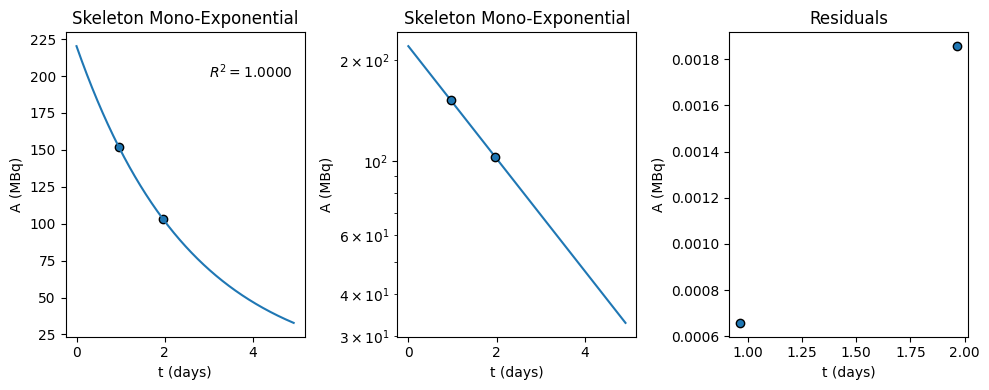

Covariance of the parameters could not be estimated


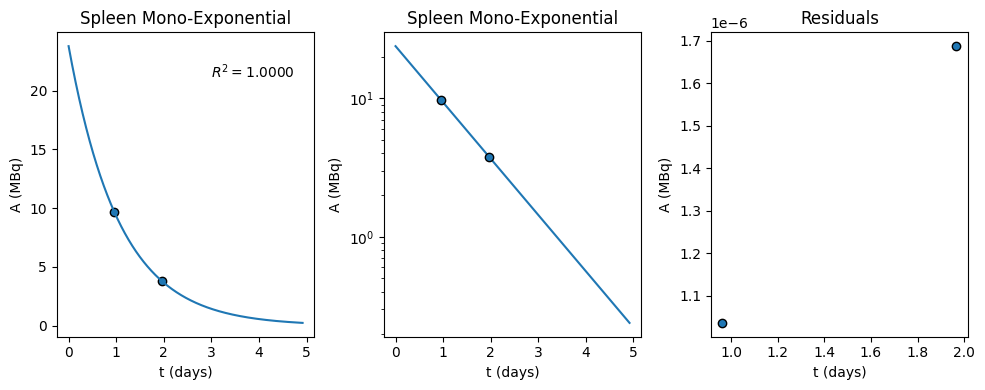

Covariance of the parameters could not be estimated


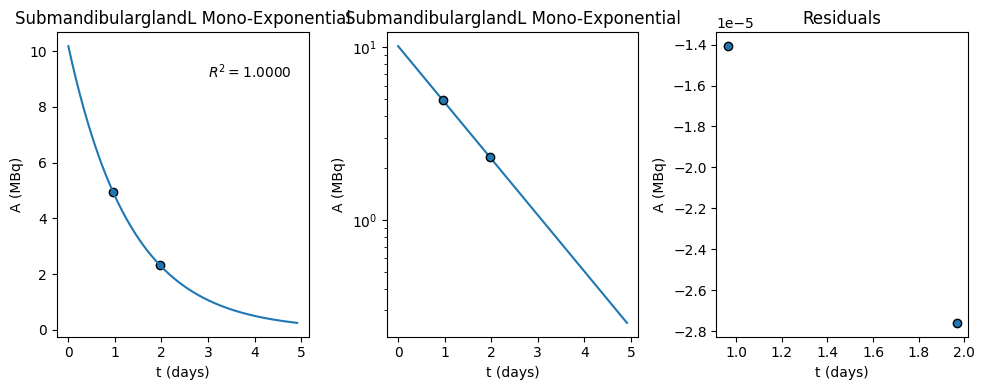

Covariance of the parameters could not be estimated


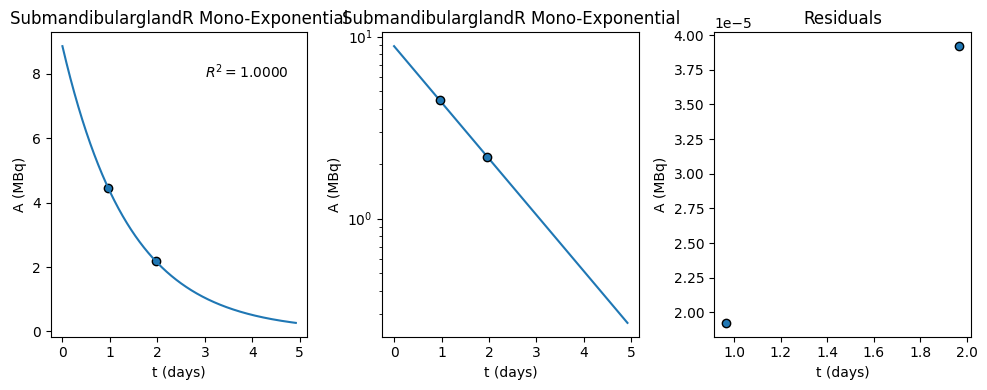

Covariance of the parameters could not be estimated


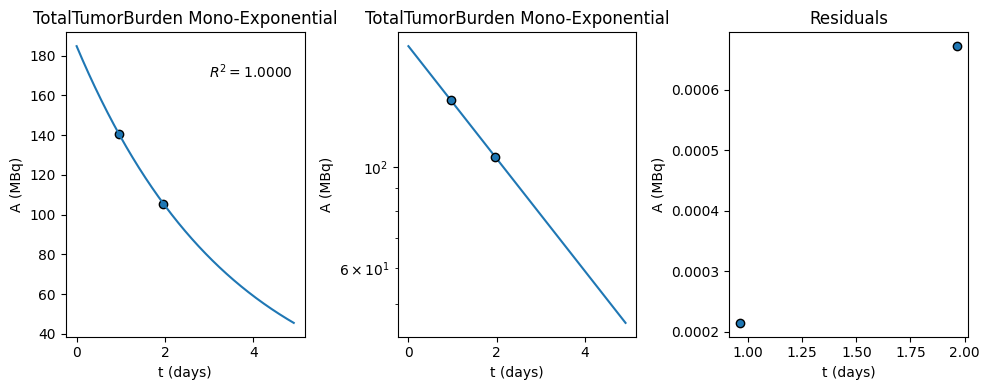

Covariance of the parameters could not be estimated


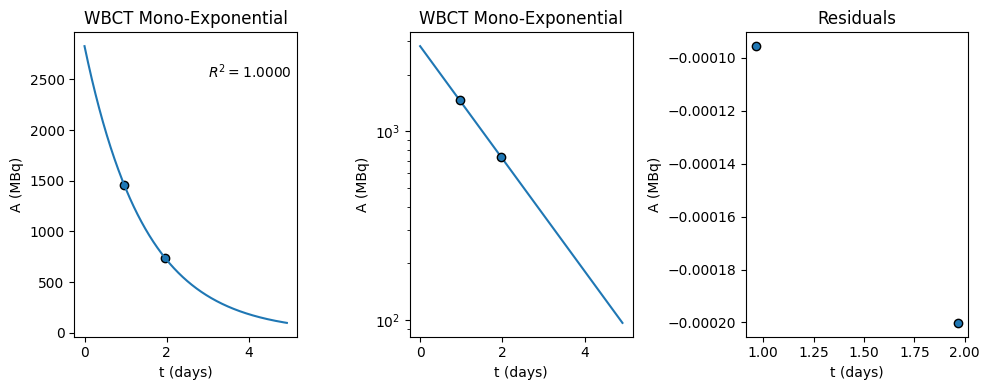

Covariance of the parameters could not be estimated


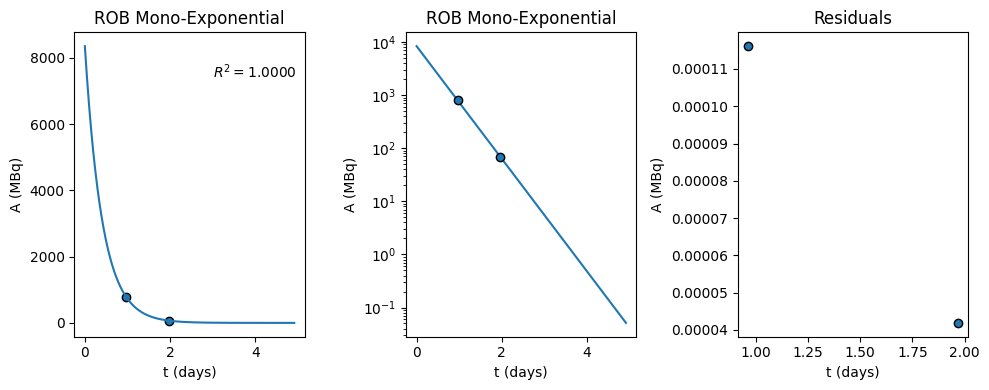

In [104]:
df, lamda_eff_dict = CAVA0004_cycle01.fitting('monoexp')

In [105]:
CAVA0004_cycle01.create_TIA()

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

CT image:


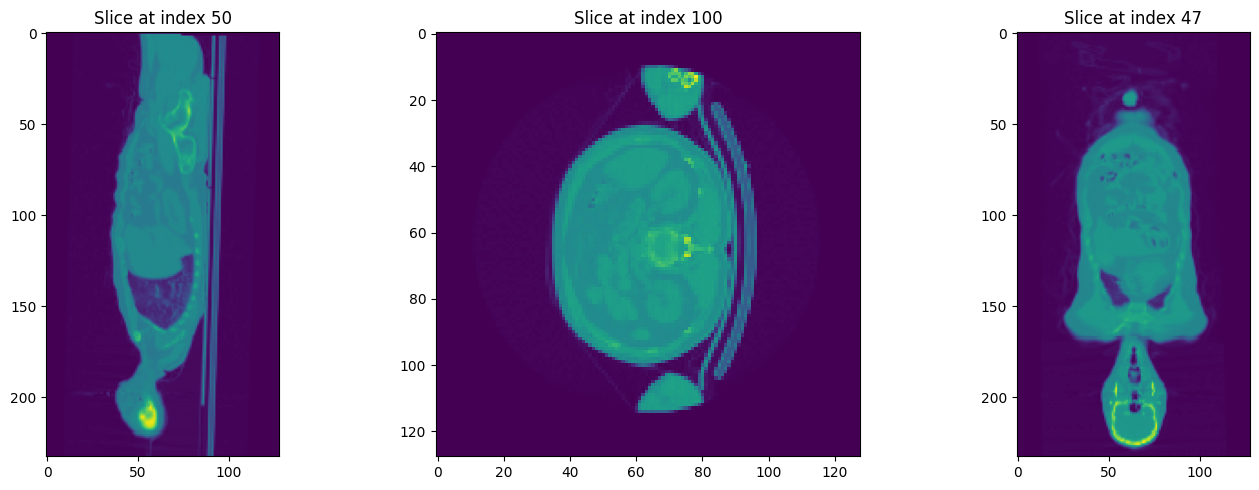

TIA image:


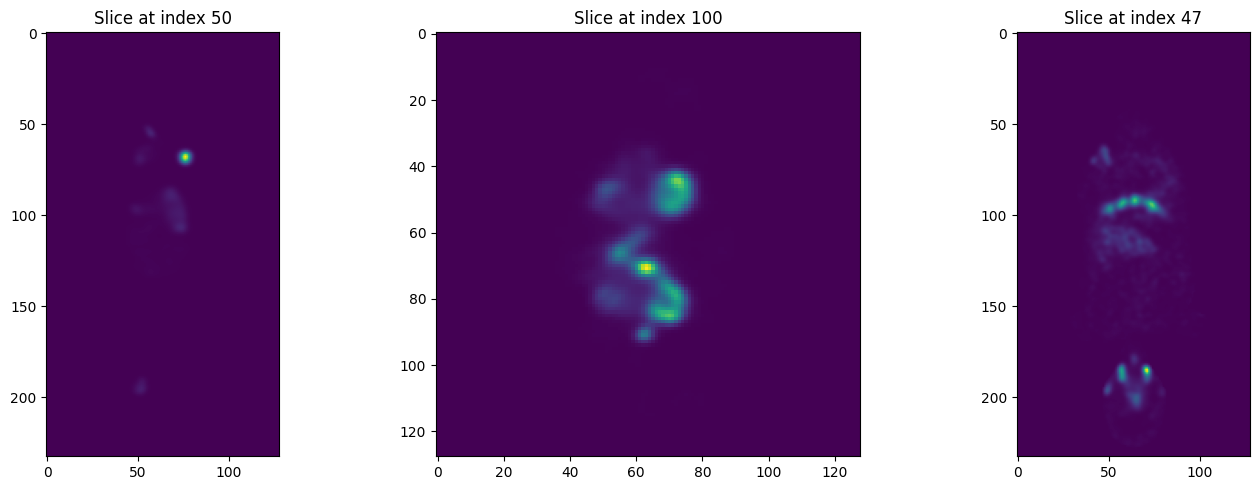

SPECTMBq image:


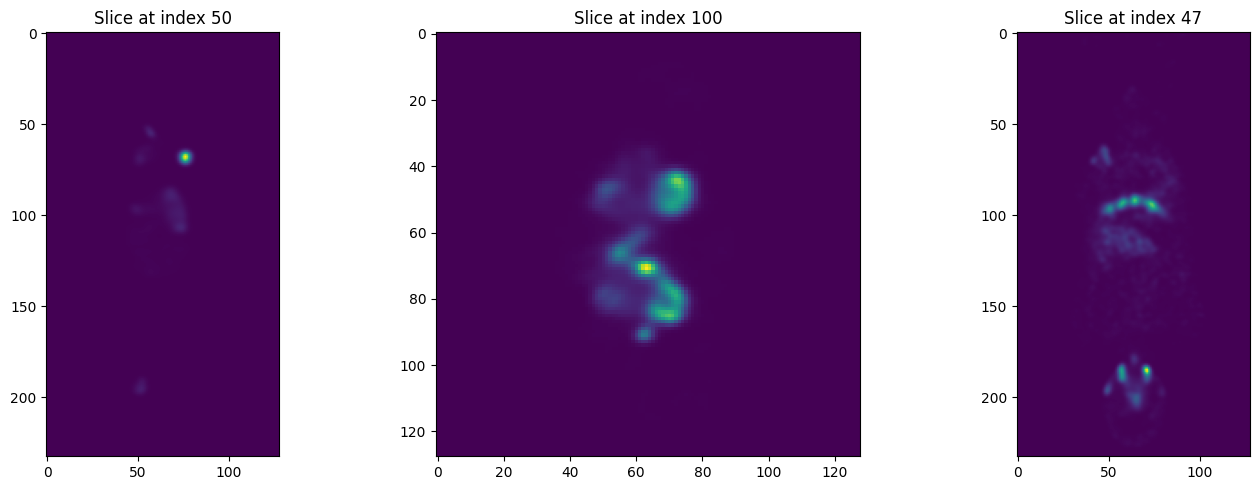

In [106]:
TIAMBqs, SPECTMBq = CAVA0004_cycle01.flip_images()

In [10]:
CAVA0004_cycle01.normalise_TIA()

In [11]:
CAVA0004_cycle01.save_images()

## Monte Carlo

In [ ]:
output_dir = f"/mnt/y/Sara/PR21_dosimetry/{patient_id}/cycle0{cycle}/MC"
CAVA0004_cycle01_MC = MonteCarlo(10, 1e9, output_dir)

In [ ]:
CAVA0004_cycle01_MC.split_simulations()

In [ ]:
CAVA0004_cycle01_MC.run_MC()

gate main_normalized_1.mac >> output-1.txt 2>&1 &
gate main_normalized_2.mac >> output-2.txt 2>&1 &
gate main_normalized_3.mac >> output-3.txt 2>&1 &
gate main_normalized_4.mac >> output-4.txt 2>&1 &
gate main_normalized_5.mac >> output-5.txt 2>&1 &
gate main_normalized_6.mac >> output-6.txt 2>&1 &
gate main_normalized_7.mac >> output-7.txt 2>&1 &
gate main_normalized_8.mac >> output-8.txt 2>&1 &
gate main_normalized_9.mac >> output-9.txt 2>&1 &
gate main_normalized_10.mac >> output-10.txt 2>&1 &


After the simulation is done, run the following line

In [ ]:
dosemap = getdosemapdata(patient_id, cycle)

/mnt/y/Sara/PR21_dosimetry/CAVA0004/cycle01/MC/output/DoseimageGy_MC.hdr
1.2.840.10008.5.1.4.1.1.2
1.2.826.0.1.3680043.10.740.6048439480987740658090176328874005953
1.2.826.0.1.3680043.10.740.2362138874319727035222927285105155066
1.2.840.10008.5.1.4.1.1.481.5
2.16.840.1.114362.1.12083842.24797977164.600229313.773.6524


## VSV Kernel

In [12]:
CAVA0004_cycle01_DVK = DoseVoxelKernel(TIAMBqs, CT)

In [13]:
CAVA0004_cycle01_DVK.kernel()

In [14]:
dosemap_nonweighted = CAVA0004_cycle01_DVK.convolution()

In [15]:
dosemap = CAVA0004_cycle01_DVK.weighting(dosemap_nonweighted) #mGy

In [65]:
dosemap = dosemap / 1000 #Gy

## Olinda

In [ ]:
CAVA0004_cycle01_Olinda = Olinda(df, isotope)

In [ ]:
CAVA0004_cycle01_Olinda.phantom_data()

   patient_id  cycle                 organ  volume_ml  lamda_eff_1/s  \
0    CAVA0004      1              1_Lesion      58.77       0.000003   
1    CAVA0004      1      2_Lesion_Hottest      47.63       0.000004   
2    CAVA0004      1              3_Lesion      12.02       0.000001   
3    CAVA0004      1              4_Lesion      10.14       0.000001   
4    CAVA0004      1              5_Lesion       0.20       0.000001   
5    CAVA0004      1  Bladder_Experimental     425.96       0.000017   
6    CAVA0004      1               Femur_L       0.52       0.000001   
7    CAVA0004      1               Femur_R       0.52       0.000009   
8    CAVA0004      1             Humerus_L       0.52       0.000011   
9    CAVA0004      1             Humerus_R       0.34       0.000013   
10   CAVA0004      1            Kidney_L_a     147.31       0.000007   
11   CAVA0004      1            Kidney_L_m     214.44       0.000008   
12   CAVA0004      1            Kidney_R_a     178.39       0.00


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [ ]:
# The Remainder value is automatically calculated from the total normalized number of disintegrations of the isotope (=Half-time[h]/ln(2)) minus the activity found in the organs (excluding the bladder)

In [ ]:
# In this population, trabecular bone – due to its lesser density when compared to cortical bone – provides only about 20% of the skeletal bone mass but it is responsible for most of the turnover [10,13].

In [ ]:
CAVA0004_cycle01_Olinda.create_case_file()

Index(['', '', '', '', '', '', '', ''], dtype='object')


IndexError: list index out of range

## Results

In [17]:
CAVA0004_cycle01_dosemap = Dosemap(df, patient_id, cycle, dosemap, RT, organslist)

In [ ]:
#CAVA0004_cycle01_dosemap.image_visualisation(image_weighted)
#for organ in organlist:
#    CAVA0004_cycle01_dosemap.image_visualisation(RT[organ])

In [19]:
CAVA0004_cycle01_dosemap.show_mean_statistics()

1_Lesion 6.338628258962608
2_Lesion_Hottest 12.731379818890062
3_Lesion 4.310146310010383
4_Lesion 4.191687316144373
5_Lesion 2.2623098496259115
Bladder_Experimental 0.35105706527825964
Femur_L 0.04051819562582239
Femur_R 0.01571350711434646
Humerus_L 0.021630996365320957
Humerus_R 0.011889118332407932
Kidney_L_a 2.717454673889232
Kidney_L_m 2.2954421119207744
Kidney_R_a 2.6921666219851854
Kidney_R_m 2.4663137716602495
L1 0.08384423462190978
L2 0.2943929767292071
L3 0.33741765176725036
L4 0.11162278483032209
Liver 0.27427025904320657
Liver_Reference 0.28887221857221423
ParotidglandL 1.70039369911692
ParotidglandR 1.9315143956172316
Skeleton 0.18756369378779444
Spleen 0.13753083856958545
SubmandibularglandL 3.727202794964278
SubmandibularglandR 3.2004583037658745
TotalTumorBurden 8.337680431817846
WBCT 0.13084624268621425
ROB 0.1241444337919833


In [20]:
CAVA0004_cycle01_dosemap.calculate_bed()

Kidney_L_a 2.993391635186696
Kidney_R_a 2.988159703141393


In [ ]:
CAVA0004_cycle01_dosemap.dose_volume_histogram()

In [ ]:
df.to_csv(f"/mnt/y/Sara/PR21_dosimetry/output/{patient_id}_cycle0{cycle}_dosimetry_output.csv")

## Dosiomics

In [96]:
imagemodality = 'dosemap'
CAVA0004_cycle01_dosiomics = Radiomics(imagemodality, patient_id, cycle, dosemap, RT, organslist)

In [97]:
CAVA0004_cycle01_dosiomics.prepareimages()

In [98]:
dosiomics_df = CAVA0004_cycle01_dosiomics.featureextractor()

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
Mean of empty slice
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Avera

## SPECT radiomics

In [ ]:
imagemodality = 'spect'
CAVA0004_cycle01_spect_radiomics = Radiomics(imagemodality, patient_id, cycle, SPECTMBq, RT, organslist)

In [ ]:
CAVA0004_cycle01_spect_radiomics.prepareimages()

In [ ]:
spect_radiomics_df = CAVA0004_cycle01_spect_radiomics.featureextractor()